<a href="https://colab.research.google.com/github/Onamihoang/CIFAR10_DL01/blob/master/fine_tune_CIFAR100_Submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model,Model
from keras.datasets import cifar100
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [6]:
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


219062272/219055592 [==============================] - 2s 0us/step


In [7]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 127, 127, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 127, 127, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 127, 127, 32) 0           batch_normalization_282[0][0]    
________________________________________________________________________________

In [8]:
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

169009152/169001437 [==============================] - 2s 0us/step


[82 79 54 98 55]


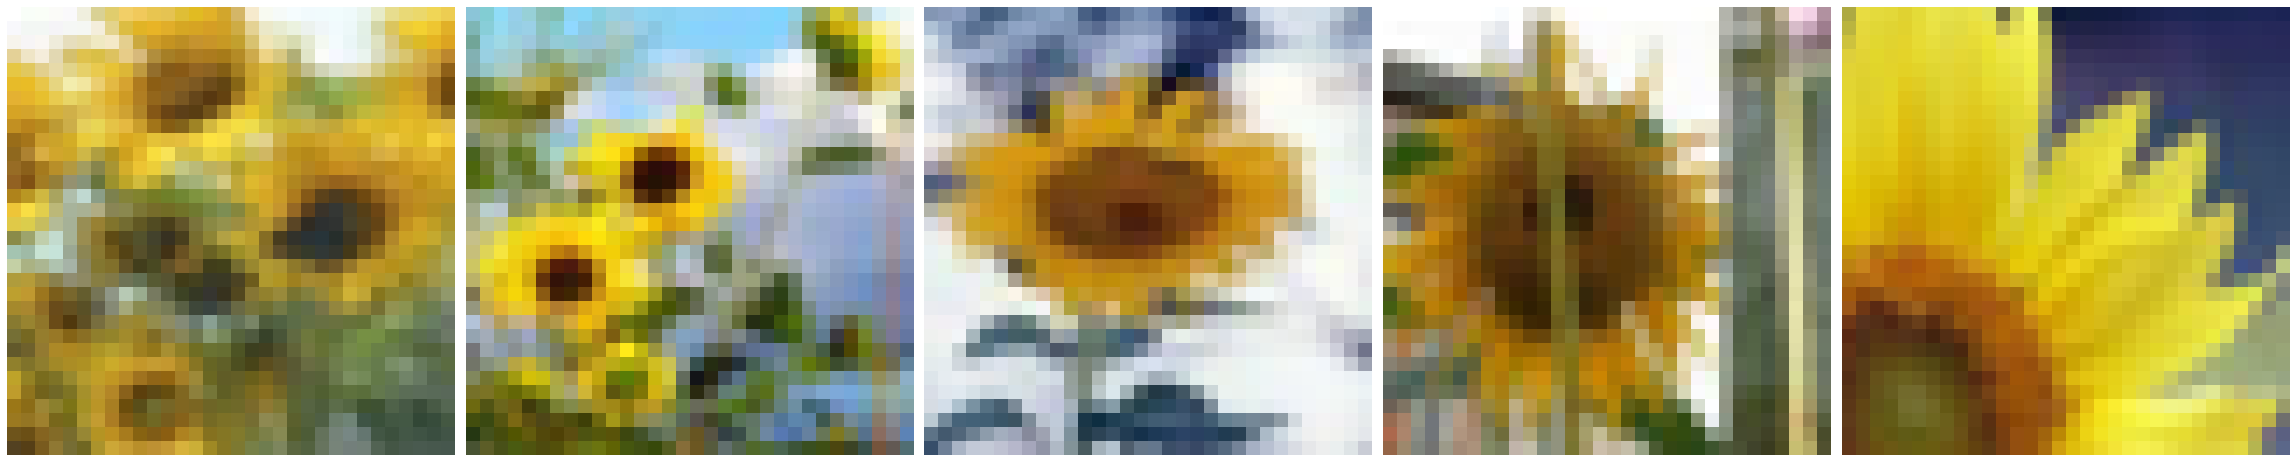

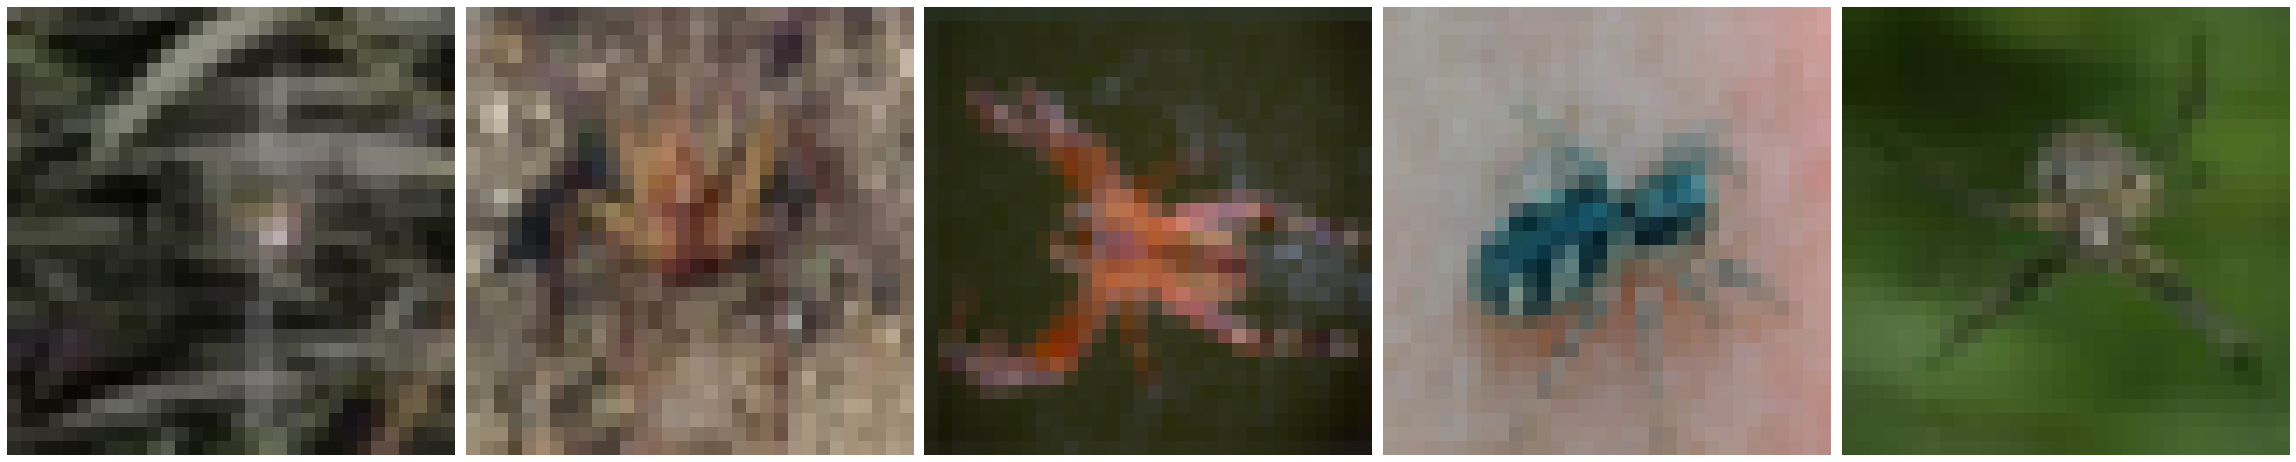

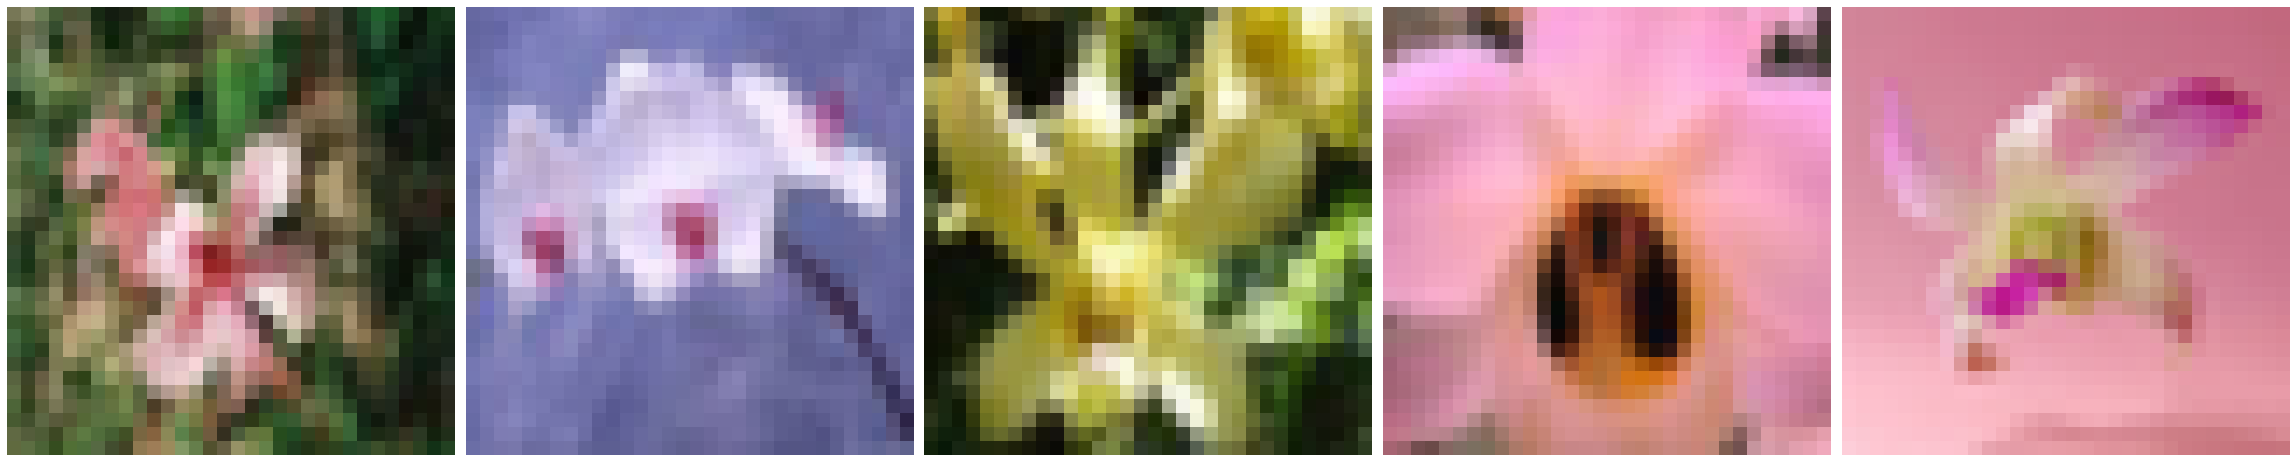

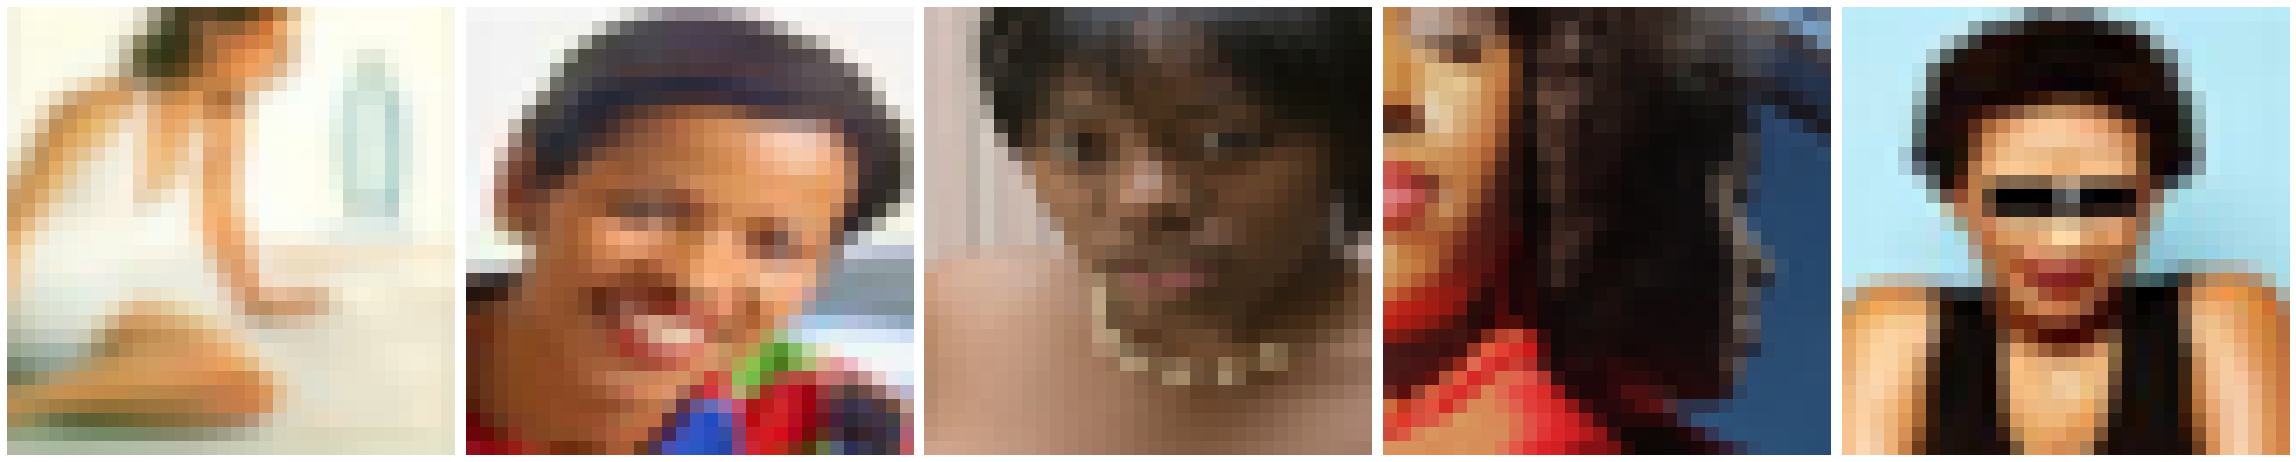

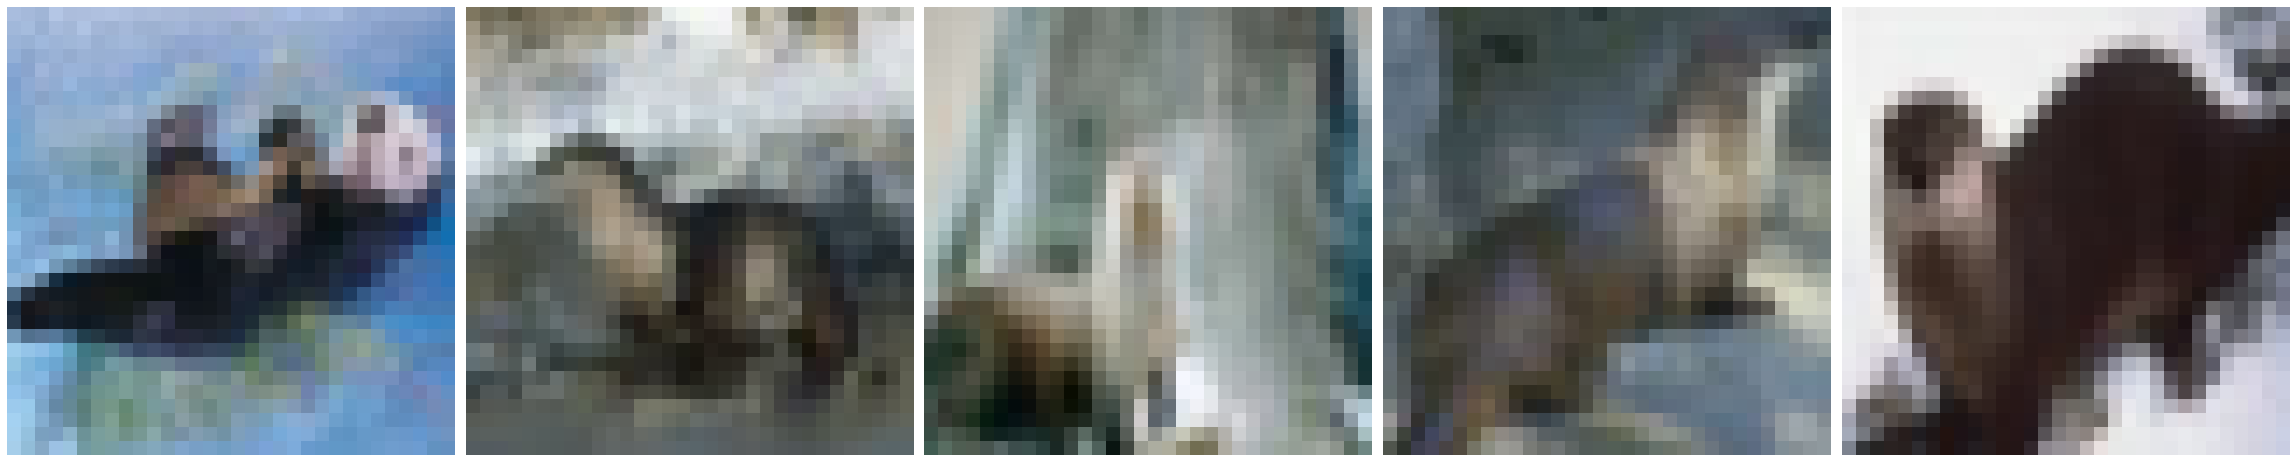

In [9]:
class_plotted = np.random.choice(range(100), 5, replace = False)
print(class_plotted)
for i in range(len(class_plotted)):
    image_samples = x_train[y_train.reshape(-1) == class_plotted[i]][:5]
    fig, ax = plt.subplots(nrows = 1, ncols = 5,figsize = (32,32))
    for j in range(5):
        ax[j].imshow(image_samples[j])
        ax[j].axis('off')  
    fig.tight_layout()
plt.show()

In [10]:
x_train = x_train / 255.0
x_val = x_val / 255
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 100)
y_val = np_utils.to_categorical(y_val, 100)
y_test = np_utils.to_categorical(y_test, 100)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
model = models.Sequential()

model.add(layers.UpSampling2D((8,8),data_format=None,interpolation= 'bilinear'))

model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(100, activation='softmax'))


In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

##es = EarlyStopping(monitor='val_acc', mode='max', min_delta=1)

model.compile(optimizer=optimizers.Adam(lr=2e-5), loss= tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 683s 17ms/sample - loss: 3.5112 - acc: 0.2784 - val_loss: 1.7060 - val_acc: 0.6775
Epoch 2/10
40000/40000 [==============================] - 635s 16ms/sample - loss: 1.7739 - acc: 0.6855 - val_loss: 1.1168 - val_acc: 0.7698
Epoch 3/10
40000/40000 [==============================] - 635s 16ms/sample - loss: 1.1741 - acc: 0.8104 - val_loss: 0.9455 - val_acc: 0.8082
Epoch 4/10
40000/40000 [==============================] - 634s 16ms/sample - loss: 0.8354 - acc: 0.8761 - val_loss: 0.9001 - val_acc: 0.8151
Epoch 5/10
40000/40000 [==============================] - 636s 16ms/sample - loss: 0.6106 - acc: 0.9161 - val_loss: 0.8907 - val_acc: 0.8215
Epoch 6/10
40000/40000 [==============================] - 637s 16ms/sample - loss: 0.4711 - acc: 0.9386 - val_loss: 0.9277 - val_acc: 0.8156
Epoch 7/10
40000/40000 [==============================] - 637s 16ms/sample - loss: 0.3679 - acc: 0.9549 

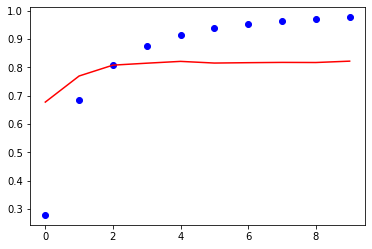

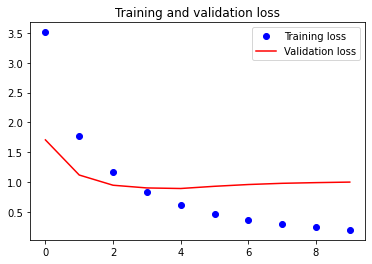

In [18]:
import matplotlib.pyplot as plt
def summarize_diagnostics(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.show()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

summarize_diagnostics(history)

In [15]:
 model.save('my_model.h5')
# del model
model = tf.keras.models.load_model('my_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 49s 5ms/sample - loss: 1.0382 - acc: 0.8160


[1.0381728227734566, 0.816]

In [0]:
model.summary()